In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %pip install seaborn
import seaborn as sns

# %pip install scipy
from scipy.stats import linregress

In [2]:
# Read data from file

file_path = 'https://raw.githubusercontent.com/ayabongatshitshi-lab/Data-Science-Projects/refs/heads/main/SeaLevel/epa-sea-level.csv'


levels = pd.read_csv(file_path)
levels.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


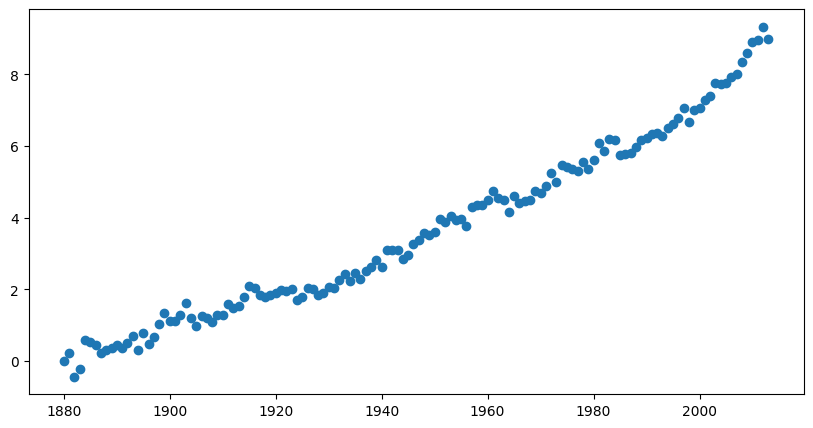

In [3]:
# Create scatter plot

fig,ax = plt.subplots(figsize=(10,5))
x = levels['Year']
y = levels['CSIRO Adjusted Sea Level']
ax.scatter(x,y)


In [4]:
# Create first line of best fit

reg1 = linregress(x,y)

x1 = np.arange(levels['Year'].min(), 2051, 1) ## extend x-vals (indp) : go from earliest recorded year to 2051 (through 2051)
y1 = list(reg1.slope*x1 + reg1.intercept)          ## reg line: y = mx + c

ax.plot(x1,y1, linestyle='--', c='black')

In [5]:
## Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
## Make the line also go through the year 2050 to predict the sea level rise in 2050...
# if the rate of rise continues as it has since the year 2000.

In [6]:
# Create second line of best fit

levels2 = levels [levels['Year']>=2000]     ## to use only data from 2000
reg2 = linregress(levels2['Year'], levels2['CSIRO Adjusted Sea Level'])

x2 = np.float64(np.arange(2000, 2051, 1))        ## take x (indp var.) from 2000 to 2051 ('go through 2050')
y2 = list(reg2.slope*x2 + reg2.intercept)
ax.plot(x2,y2, linestyle='--', c='r' )

In [7]:
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

Text(0.5, 1.0, 'Rise in Sea Level')

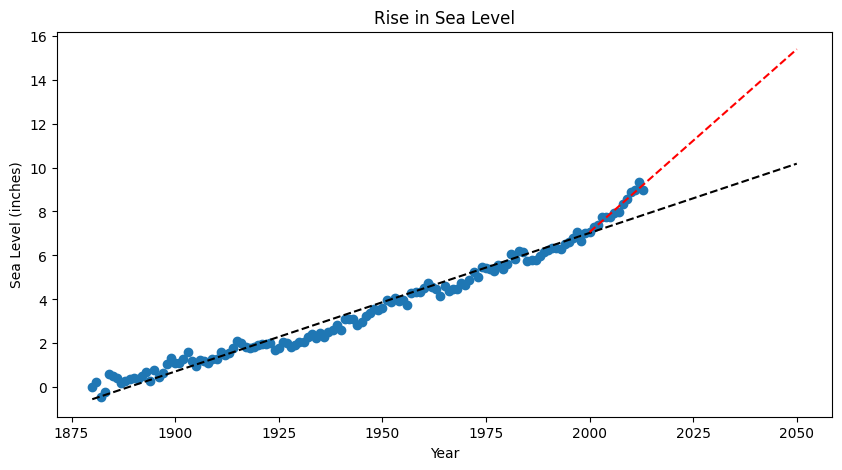

In [8]:
fig

In [9]:
fig.savefig('ScatterFig1')